## VERİ  SETİ HİKAYESİ

### Veri Kümesine Genel Bakış

Health_fitness_dataset, 3.000 katılımcının 2024 yılına ait günlük gerçek sağlık ve fitness izleme verilerini içermektedir. Bu veri kümesi günlük aktiviteleri, önemli sağlık göstergelerini ve yaşam tarzı faktörlerini yakalar ve sağlık analizi ve tahmine dayalı modelleme için büyük değere sahiptir.

## PROJE HANGİ PROBLEME ÇÖZÜM GETİRMEYİ HEDEFLİYOR?

3000 kişinin günlük sağlık verileri baz alınarak, yeni bir kullanıcının mevcut sağlık durumu ve spor aktiviteleri sonucu girdiği veriler ile  sağlık seviyesinin (fitness_level:sürekli değişken) matematiksel olarak hesaplanması amaçlanmaktadır. Yani bu bir regresyon problemi olacaktır.

Projenin Gözetimsiz Öğrenme kısmında ise, 3000 kişinin günlük  sağlık ve spor bilgilerindeki benzerliklere göre; yeni kullanıcının hangi sağlık grubuna dahil olduğu tespit edilecektir.Bu kısım ile ilgili https://www.kaggle.com/code/zdengltekin/health-and-fitness-unsupervised linki inceleyebilirsiniz. 

### PROJENİN KONUSU

3000 kişilik bir kitlenin günlük spor aktiviteleri ve güncel sağlık durumlarını içeren 687701 tane verisi mevcuttur. Bu veriyi baz alarak amaç;

* Gözetimli öğrenme ile  yeni gelen kullanıcının girmiş olduğu bilgilere göre; 1 gün içerisinde yaptığı spor ve mevcut sağlık durumuna göre fitness_level hesaplamaktır.

* Gözetimsiz öğrenme ile mevcut veri setindeki  kişilerin günlük  sağlık ve spor alışkanlıklarının benzerliklerine göre; yeni kullanıcının hangi gruba dahil olacağını tespit etmektir.


### MAKİNE ÖĞRENMESİ NEDİR?

Veriden örüntüleri ya da benzerlikleri öğrenerek tahmin, sınıflanırma veya karar almamızı kolaylaştıran yapay zekanın alt dalıdır.

**Gözetimli Öğrenme:**

Girdi(bağımsız değişken ya da değişkenler) ve çıktı(hedef değişken ya da değişkenler) mantığına dayanır.

Bağımsız değişkenler, modelin verideki örüntüyü öğrenmesini sağlar. Bağımsız değişkenlerin etkisine göre modelin çıktısı oluşur. Bu da bizim hedef değişken ya da hedef değişkenlerimiz olur.

Bu kısmıda gözetimli öğrenme algoritması olarak **Random Forest ve XGBoost modeli** kullanılacaktır. Hedef değişken fitness_level olup numerik değişkendir. Regresyon yöntemi ile yeni kişinin sağlık seviyesi tahminlenecektir. 

Regresyon, makine öğrenmesi ve istatistikte sürekli (sayısal) bir değişkeni tahmin etmek için kullanılan bir yöntemdir.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, validation_curve
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#Modeli Kaydetme

import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/health-and-fitness-dataset/health_fitness_dataset.csv')
df.head(100)

,participant_id,date,age,gender,height_cm,weight_kg,bmi,activity_type,duration_minutes,intensity,...,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,endurance_level,sleep_hours,stress_level,hydration_level,smoking_status,health_condition,fitness_level
0,1,2024/1/1,56,F,165.3,50.55,18.50,Dancing,42.1,Low,...,69.5,110.7,72.9,5.37,6.6,4,1.5,Never,NaN,0.04
1,1,2024/1/4,56,F,165.3,55.38,20.27,Swimming,66.9,Low,...,69.5,110.7,72.9,5.39,8.1,3,1.8,Never,NaN,0.07
2,1,2024/1/5,56,F,165.3,56.49,20.68,Swimming,20.0,Medium,...,69.5,110.7,72.9,5.42,6.2,5,2.7,Never,NaN,0.09
3,1,2024/1/7,56,F,165.3,52.23,19.12,Weight Training,23.5,Medium,...,69.5,110.7,72.9,5.44,7.2,4,2.6,Never,NaN,0.21
4,1,2024/1/9,56,F,165.3,53.96,19.75,Swimming,75.0,Medium,...,69.5,110.7,72.9,5.47,7.1,7,1.5,Never,NaN,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2024/5/6,56,F,165.3,51.84,18.97,Weight Training,77.2,Low,...,69.5,110.7,72.9,7.82,7.0,5,2.3,Never,NaN,7.78
96,1,2024/5/8,56,F,165.3,54.48,19.94,Weight Training,98.1,Low,...,69.5,110.7,72.9,7.85,7.4,10,3.4,Never,NaN,7.86
97,1,2024/5/9,56,F,165.3,50.97,18.65,Dancing,49.4,Medium,...,69.5,110.7,72.9,7.87,7.6,6,3.1,Never,NaN,8.00
98,1,2024/5/11,56,F,165.3,55.48,20.30,Dancing,53.2,High,...,69.5,110.7,72.9,7.90,7.5,6,2.7,Never,NaN,8.06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687701 entries, 0 to 687700
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   participant_id            687701 non-null  int64  
 1   date                      687701 non-null  object 
 2   age                       687701 non-null  int64  
 3   gender                    687701 non-null  object 
 4   height_cm                 687701 non-null  float64
 5   weight_kg                 687701 non-null  float64
 6   bmi                       687701 non-null  float64
 7   activity_type             687701 non-null  object 
 8   duration_minutes          687701 non-null  float64
 9   intensity                 687701 non-null  object 
 10  calories_burned           687701 non-null  float64
 11  daily_steps               687701 non-null  int64  
 12  avg_heart_rate            687701 non-null  int64  
 13  resting_heart_rate        687701 non-null  f

Ham verimiz 23 sütun içermekte olup 3000 kişinin 2024 yılına aittir. Kişilerin günlük sağlık ve spor bilgilerinin toplam satır sayısı 687701 dir. health_condition sütunundaki eksik veriler sağlıklı statüsündeki kişilerdir.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
participant_id,687701.0,1499.781828,865.997215,1.00,749.00,1499.00,2249.00,3000.00
age,687701.0,41.658602,13.581770,18.00,30.00,42.00,53.00,64.00
height_cm,687701.0,168.587699,9.140811,145.00,161.70,168.20,175.30,198.50
weight_kg,687701.0,61.728155,8.547730,39.76,55.50,61.06,67.31,98.11
bmi,687701.0,21.663562,1.939251,18.50,20.06,21.64,23.27,24.90
duration_minutes,687701.0,74.026662,35.095472,20.00,46.30,72.80,99.50,152.10
calories_burned,687701.0,15.381302,9.985552,0.80,7.80,13.00,20.70,92.00
daily_steps,687701.0,8628.370918,2054.756608,-419.00,7203.00,8607.00,10027.00,17241.00
avg_heart_rate,687701.0,131.454165,17.814744,82.00,118.00,130.00,144.00,206.00
resting_heart_rate,687701.0,70.010547,5.074563,51.10,66.50,70.00,73.50,87.10


## Veri Seti İstatistiksel Özeti ve Yorumları

**Gözlem Sayısı:** Tüm değişkenlerde `687.701` kayıt bulunmakta, eksik veri görünmüyor.

### Demografik Özellikler
- **participant_id**: Ortalama 1499 kayıt/katılımcı → tekrar eden ölçümler mevcut.
- **age**: Ortalama yaş 41.7 (18–64 arası). Genellikle orta yaş grubu bireylerden oluşuyor.
- **height_cm**: Ortalama 168.6 cm (145–198.5 cm). Boy dağılımı normal.
- **weight_kg**: Ortalama 61.7 kg (39.7–98.1 kg). Kilo dağılımı normal sınırlarda.
- **bmi**: Ortalama 21.66 → Genelde “normal kilolu” aralığında (18.5–24.9). Std: 1.94 ile düşük → homojen.


### Aktivite Bilgileri
- **duration_minutes**: Ortalama egzersiz süresi 74 dk (min: 20, max: 152). Yüksek varyans → kişiler arası fark fazla.
- **daily_steps**: Ortalama 8.628 adım (min: 36, max: 17.241).
- Negatif değer hatalı, temizlenmeli.
- **calories_burned**: Ortalama 15.38 (std: 9.98). Bazı yüksek değerler (max: 92) kontrol edilmeli.

###  Sağlık Verileri
- **avg_heart_rate**: Ortalama 131 bpm (min: 82, max: 206) → Spor sırasında ölçülmüş ort kalp hızıdır. Kalp atım hızı efor düzeyini yansıtır.<br>
Düşük 90-100
Orta 110-140
Yüksek 140-170
max 170-200
- **resting_heart_rate**: Ortalama 70 bpm, dağılım makul (51–87).
- **blood_pressure_sys**: Ortalama 119.8 mmHg (78–152) → hafif hipertansiyon üst sınırında.
- **blood_pressure_dia**: Ortalama 80.3 mmHg (53.7–112) → bazı bireylerde diastolik yüksek.

### Diğer Sağlık ve Yaşam Tarzı Değişkenleri
- **endurance_level**: Ortalama 9.21 → aktivite kapasitesi orta düzeyde.
- **sleep_hours**: Ortalama 7.05 saat (min: 4) → sağlıklı uyku seviyesi, ama bazı bireylerde düşük.
- **stress_level**: Ortalama 5.47 (std: 1.97) → stres düzeyi orta ama değişkenlik yüksek.
- **hydration_level**: Ortalama 2.49 litre → hidrasyon genellikle yeterli.
- **fitness_level**: Ortalama 9.52, minimum 0.02 – maksimum 21.93 → dağılım geniş


### VERİ TOPLAMA VE ÖN İŞLEME

In [5]:
null_df = df.isnull().sum().reset_index()
null_df.columns = ['column_name', 'missing_count']
print(null_df)

                 column_name  missing_count
0             participant_id              0
1                       date              0
2                        age              0
3                     gender              0
4                  height_cm              0
5                  weight_kg              0
6                        bmi              0
7              activity_type              0
8           duration_minutes              0
9                  intensity              0
10           calories_burned              0
11               daily_steps              0
12            avg_heart_rate              0
13        resting_heart_rate              0
14   blood_pressure_systolic              0
15  blood_pressure_diastolic              0
16           endurance_level              0
17               sleep_hours              0
18              stress_level              0
19           hydration_level              0
20            smoking_status              0
21          health_condition    

health_condition sütunundaki  eksik değerler, "no ilness" kategorisinde olan kişilerdir. O nedenle NaN değerleri bu kategori ile dolduracağız.

In [6]:
df["health_condition"] = df["health_condition"].fillna("No illness")

In [7]:
df[df.select_dtypes(include='number').lt(0).any(axis=1)]

,participant_id,date,age,gender,height_cm,weight_kg,bmi,activity_type,duration_minutes,intensity,...,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,endurance_level,sleep_hours,stress_level,hydration_level,smoking_status,health_condition,fitness_level
207781,905,2024/10/1,59,Other,164.5,51.14,18.90,Tennis,82.3,Low,...,80.7,119.4,75.0,10.84,7.0,5,2.9,Former,No illness,16.52
360838,1573,2024/10/14,62,F,160.3,53.74,20.91,Walking,84.8,High,...,73.7,133.5,65.4,11.11,8.7,4,2.0,Never,No illness,16.16


In [8]:
df.loc[207781, "daily_steps"] = df.loc[207781, "daily_steps"]*(-1)
df.loc[[207781], "daily_steps"]


207781    419
Name: daily_steps, dtype: int64

In [9]:
df.loc[360838, "daily_steps"] = df.loc[360838, "daily_steps"]*(-1)
df.loc[360838, "daily_steps"]

81

Mantıksal olarak atılan adım sayısı negatif olamaz. Bu nedenle bu değişken değerlerini pozitif hale getirdik..

In [10]:
df["date"] = pd.to_datetime(df["date"])
df["date"].nunique()

360

date ile ilgili datetime formatına dönüştürüyoruz. Şu aşamada bu değişkeni kullanıp kullanmayacağımıza ilerleyen aşamada karar vereceğiz. Ayrıca verimizin bir yıllık(2024-01-01
2024-12-25 tarihleri arasında) sağlık ve spor verisini içerdiğini görüyoruz.

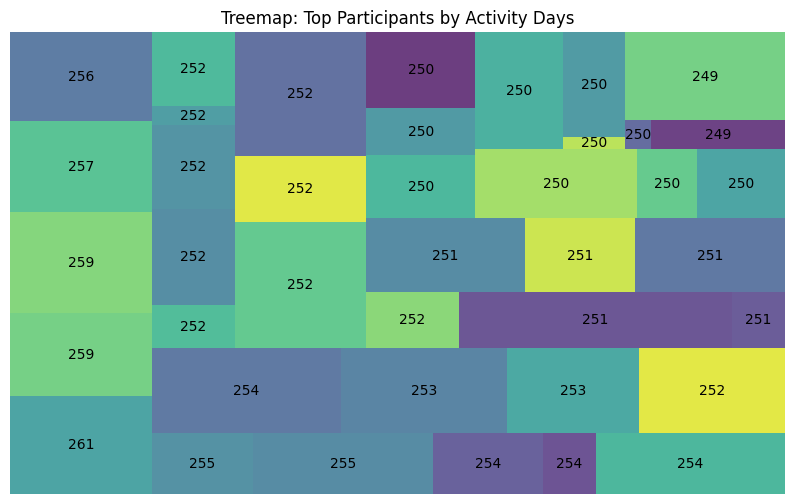

In [11]:
participant_ids = []
unique_days = []

for num in df["participant_id"].unique():
    participant_days = df[df["participant_id"] == num]["date"].nunique()
    participant_ids.append(num)
    unique_days.append(participant_days)

summary_df = pd.DataFrame({
    "participant_id": participant_ids,
    "unique_date_count": unique_days
})
summary_df.to_csv('participant_summary.csv', index=False)
summary_df
import squarify
top_n = 40
top_participants = summary_df.sort_values("unique_date_count", ascending=False).head(top_n)

plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=top_participants["participant_id"],
    label=top_participants["unique_date_count"],
    alpha=0.8
)
plt.axis('off')
plt.title("Treemap: Top Participants by Activity Days")
plt.show()

Bu veri setinde en fazla spor yapan kişi 261 gün spor yapmış. Yıllık bazda spor yapma sıklıkları ekstra sütun olarak da eklenebilir. Şimdilik bu bilgiyi bir köşede tutalım.

### KEŞİFÇİ  VERİ ANALİZİ(EDA)

**Kategorik ve Numerik Değişken Analizi**

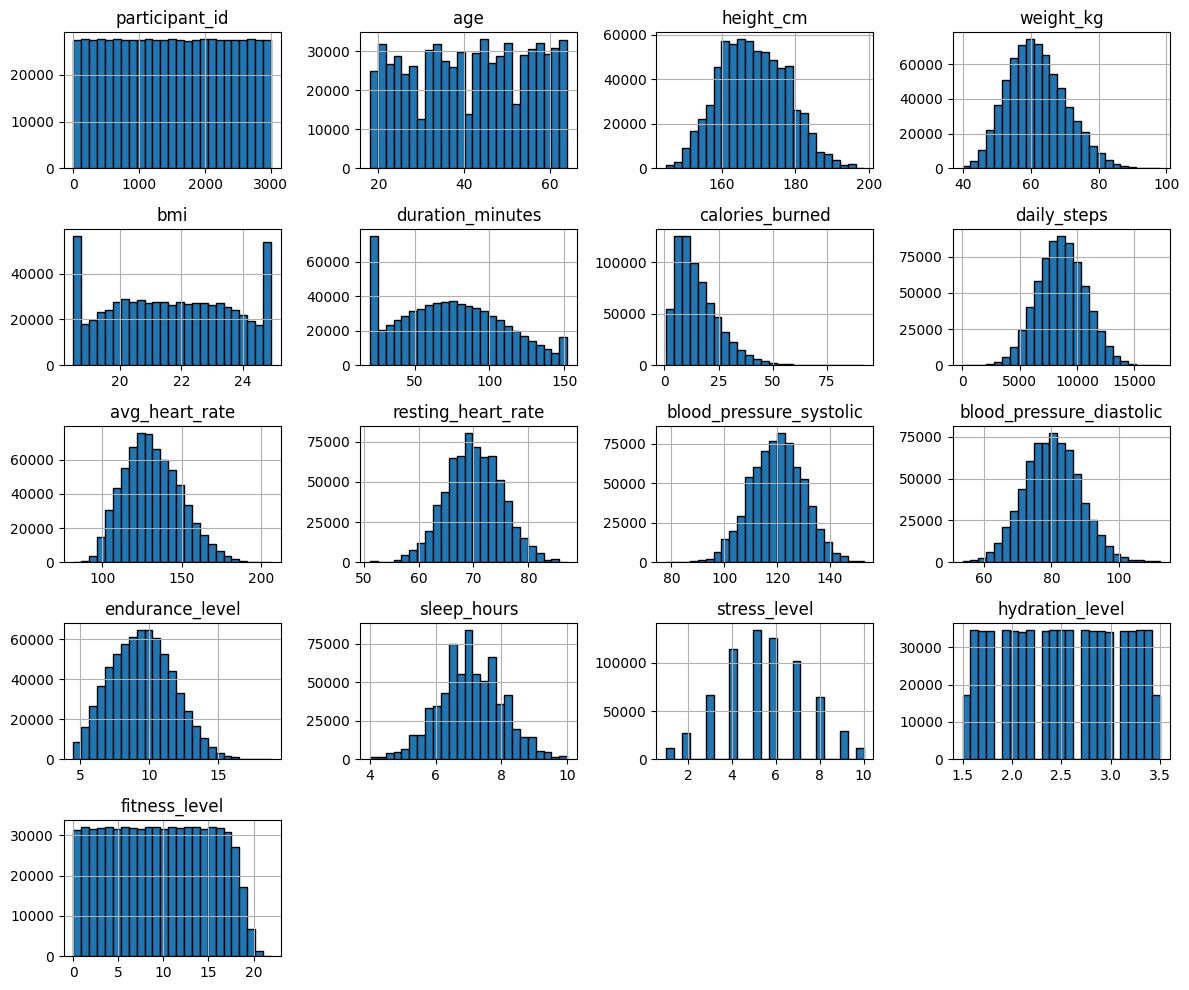

In [12]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Histogramları çiz
df[numeric_columns].hist(figsize=(12, 10), bins=25, edgecolor='black')
plt.tight_layout()
plt.show()

Bu adımda amaç, numerik değişkenlerin homojen dağılıp dağılmadığını incelemektir. Homojen dağılım, değişken değerlerinin dengeli bir şekilde dağılıp dağılmadığını gösterir. Örneğin kan basıncı verisinin burada homojen bir dağılım gösterdiğini söyleyebiliriz.  Bmı ve duration minutes uç noktalarda aykırı değerler var gibi görünüyor.calories_burned değişkeni daha çok sağa çarpık bir dağılıma sahip. Yani 0-50 arasında daha küçük değerlerde yoğunlaşmış.

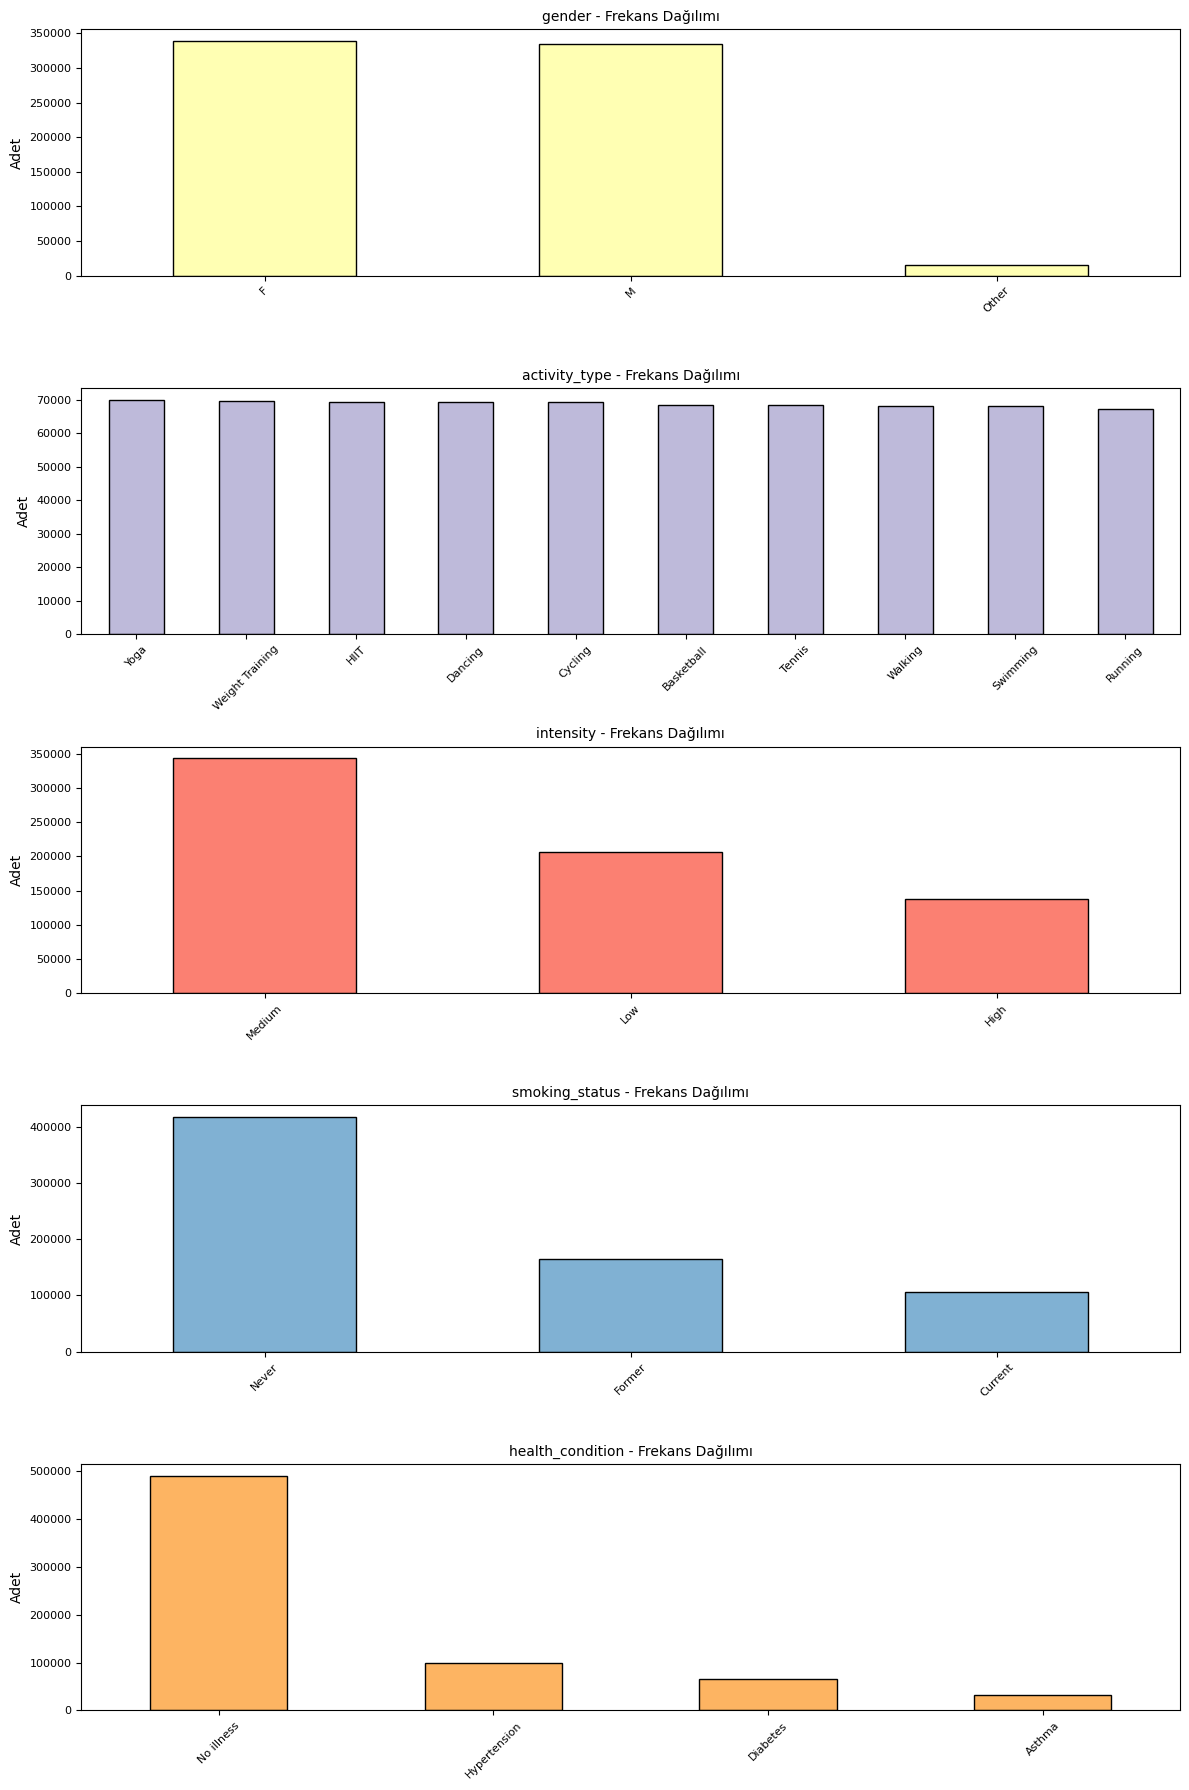

In [13]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns[:5]
plt.figure(figsize=(12, 18))
colors = plt.cm.Set3.colors
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 1, i)
    df[col].value_counts().plot(kind='bar', color=colors[i % len(colors)], edgecolor='black')
    plt.title(f'{col} - Frekans Dağılımı', fontsize=10)
    plt.xlabel('')
    plt.ylabel('Adet')
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


**Activity type ve gender** değişkenleri için veri seti için dengeli dağılmış. **Health condition** a bakarsak genelin sağlıklı olduğunu söyleyebiliriz.

**Hedef Değişken Analizi**

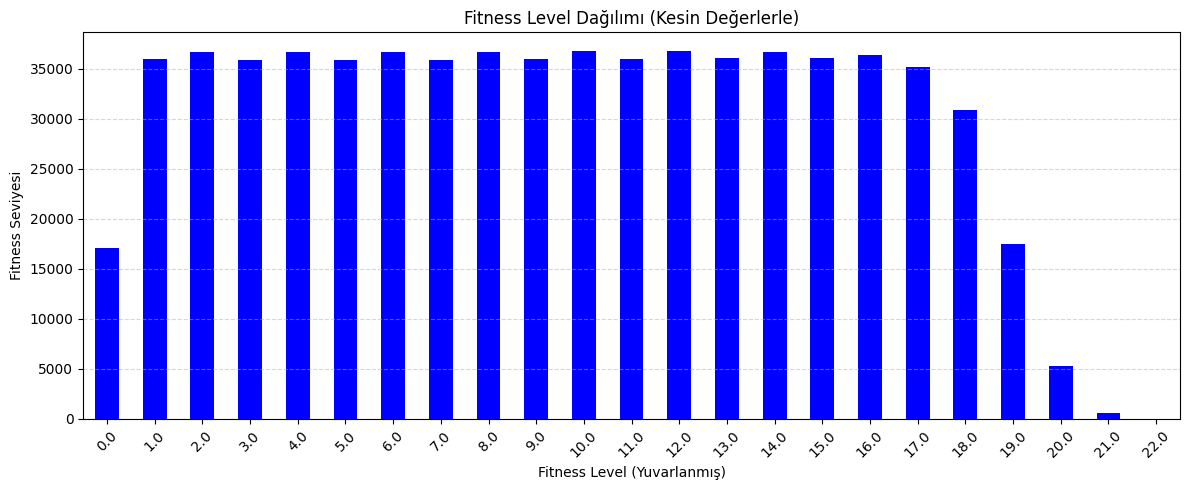

In [14]:
df['fitness_level_rounded'] = df['fitness_level'].round()

# Her değerin kaç kez geçtiğini say ve sırala
counts = df['fitness_level_rounded'].value_counts().sort_index()

# Grafik çizimi
plt.figure(figsize=(12, 5))
counts.plot(kind='bar', color='blue')

# Grafik başlık ve etiketleri
plt.title("Fitness Level Dağılımı (Kesin Değerlerle)")
plt.xlabel("Fitness Level (Yuvarlanmış)")
plt.ylabel("Fitness Seviyesi")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
df.drop('fitness_level_rounded', axis=1, inplace=True)

fitness_level hedef değişkenimiz. Sayısal olarak her bir kişinin fitnesss değeri birbirine çok yakın görünüyor. O nedenle problemimize regresyon ile yaklaşacağız. Sınıflandırma olarak ilerlersek değerler birbirine çok yakın olduğu için doğru  sınıflandırma yapmak konusunda sorun yaşayabiliriz. Özellikle ilk ve sondaki fitnes_level değerleri çok az. 

**Korelasyon Analizi**

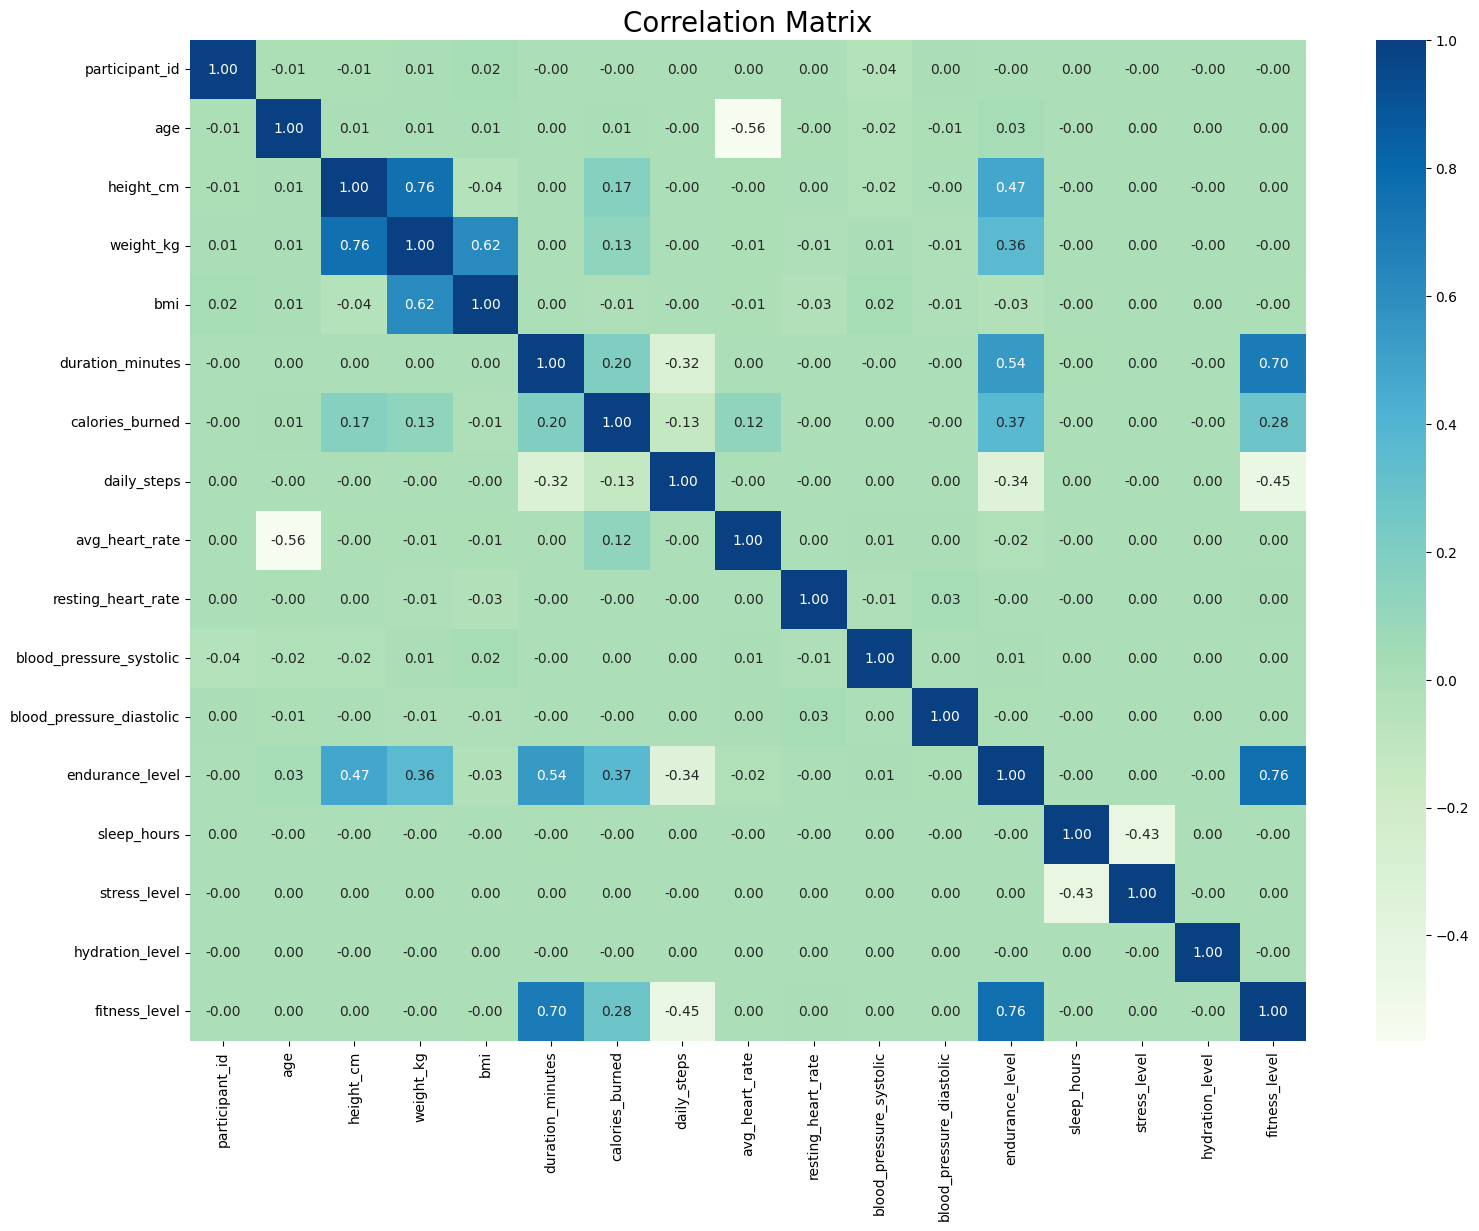

In [15]:
numeric_and_bool = df.select_dtypes(include=["number", "bool"])

numeric_and_bool.head()
corr = numeric_and_bool.corr()
corr

f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(numeric_and_bool.corr(), annot=True, fmt=".2f", ax=ax, cmap="GnBu")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

#### ÖZELLİK MÜHENDİSLİĞİ


**Özellik Çıkarma**

Bu kısım özellik mühendisliğinin en önemli kısmından biri diyebiliriz. Çünkü bu aşama; hedef değişkenimizi tahminleyebilmek için en doğru korelasyonları yakalayabileceğimiz ve veri seti örüntüsünü kaybetmeden veriyi minimize edebileceğimiz bir aşama.

In [16]:
df["endurance_heart_ratio"] = df["avg_heart_rate"] / (df["endurance_level"] + 1)

Ortalama kalp hızına göre dayanıklılık oranını ifade eder.

In [17]:
df["step_density"] = df["daily_steps"] / df["duration_minutes"].replace(0, np.nan)

In [18]:
df["sleep_efficiency"] = df["sleep_hours"] / df["duration_minutes"].replace(0, np.nan)

Yukarıda göreceği oluşturduğumuz sütunların  hedef değişken ile olan korelasyonunu tekrar inceleyelim.

In [19]:
cor_target = abs(corr["fitness_level"])
relevant_features = cor_target[cor_target>0.4]
relevant_features

duration_minutes    0.699833
daily_steps         0.449573
endurance_level     0.761940
fitness_level       1.000000
Name: fitness_level, dtype: float64

Şu an fitness_level i en güçlü tahminleyen bu 3 değer. Ancak deneme yanılma yoluyla şu an korelasyonlu görünmeyen değişken modele sokulduğunda modeli en iyi açıklayan değişken olabiliyor. O nedenle modelleme aşamasında model sonucunu en iyi hale getirecek değişkenleri tek tek deneyerek kontrol edeceğiz.

**Kodlama(One Hot Encoding)**

In [20]:
df1 =df.copy()
df1 = pd.get_dummies(df, columns=["health_condition","activity_type","intensity","smoking_status","gender"], drop_first= False)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687701 entries, 0 to 687700
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   participant_id                 687701 non-null  int64         
 1   date                           687701 non-null  datetime64[ns]
 2   age                            687701 non-null  int64         
 3   height_cm                      687701 non-null  float64       
 4   weight_kg                      687701 non-null  float64       
 5   bmi                            687701 non-null  float64       
 6   duration_minutes               687701 non-null  float64       
 7   calories_burned                687701 non-null  float64       
 8   daily_steps                    687701 non-null  int64         
 9   avg_heart_rate                 687701 non-null  int64         
 10  resting_heart_rate             687701 non-null  float64       
 11  

Yukarıda belirttiğim kategorik değişkenler modele sokulacaksa, nümerik (sayısal) tipte olması gerekir. Bu nedenle bu değişkenler için genellikle One-Hot Encoding ya da Label Encoding kullanılır.

Label Encoding ile One-Hot Encoding arasındaki temel fark; kategorilerin sıralı (ordinal) olup olmamasıyla ilgilidir. Örneğin: kategori, eğitim seviyesi gibi sıralı bir özelliği temsil ediyorsa(Lise=0,Lisans=1,Yüksek Lisans=2) burada her seviyenin bir öncekine göre daha ileri düzeyde olması gerekir.Bu durumda, Label Encoding tercih edilmelidir çünkü sıralı yapıyı korur. Öte yandan, sıralı olmayan kategoriler için (örneğin: cinsiyet, şehir, sigara içme durumu gibi) One-Hot Encoding tercih edilmelidir. Bu yöntem, her kategori için ayrı bir sütun oluşturur ve sıralama ilişkisi oluşturmaz.

In [21]:
df1 = df1[["endurance_level","endurance_heart_ratio","daily_steps","step_density","height_cm", "weight_kg", "duration_minutes", "avg_heart_rate","sleep_hours","fitness_level","smoking_status_Current","sleep_efficiency","age","smoking_status_Former","smoking_status_Never","activity_type_Cycling","activity_type_HIIT","activity_type_Running","activity_type_Swimming","activity_type_Tennis","activity_type_Walking","activity_type_Weight Training","activity_type_Yoga","smoking_status_Current","smoking_status_Former","smoking_status_Never","gender_F","gender_M","gender_Other"]]

In [22]:

numeric_and_bool = df1.select_dtypes(include=["number", "bool"])

numeric_and_bool.head()
corr = numeric_and_bool.corr()
cor_target = abs(corr["fitness_level"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

endurance_level          0.761940
endurance_heart_ratio    0.641155
daily_steps              0.449573
step_density             0.637765
duration_minutes         0.699833
fitness_level            1.000000
sleep_efficiency         0.600420
Name: fitness_level, dtype: float64

Korelasyon matrisine kategorik değişkenleri de dahil etmiş olduk. Encoding işlemine soktuğumuz kategorik değişkenler bool tipine dönüştüğünden artık korelasyon matrisine dahil edip numerik değişkenlerle olan ilişkisini inceleyebiliyoruz.Burada çok fazla değişken oluştuğu için korelasyon matrisi çizdirmek yerine; hedef değişken ile  korelasyonu 0,1 üzerinde olan değişkenleri inceledik. Modelleme aşamasında yukarıdaki değişkenleri modele sokarak nasıl sonuçlar alacağımızı inceleyeceğiz.

Özellik mühendisliği başlığı altında yer alan scaling ve aykırı değer incelemesi yapılmayacaktır.

1. Random Forest aykırı değerlerden (outlier) çok etkilenmez. Bunun nedeni, modelin verileri "büyüklüğe göre kıyaslamak" yerine "karar eşiklerine göre bölme" yapmasıdır.
2. Random Forest'ta öncesinde standartlaştırma (scaling) gerekmez.

#### MODEL OLUŞTURMA(RANDOM FOREST REGRESSOR)

Gözetimli öğrenme modellerinden Random Forest Regressor seçilmiştir. Bu modeli seçilmesindeki temel amaç, modele giren veri setindeki  aykırı değerlerden etkilenmemesi ve öncesinde bir standartlaştırma işlemine gerek duymamasıdır. Ancak bu modelde karşılaştığım sorun , süre olarak verinin eğitilmesinin uzun sürmesidir. Daha büyük veri setinde  bu sürelerin yüksek olması maliyeti de arttıracaktır. Peki, maliyetten kastımız nedir?

* Zaman maliyeti (CPU/GPU süresi)
* Bellek maliyeti (RAM kullanımı)
* Enerji ve işlem gücü (özellikle bulutta ücretlidir)

Kaggle ortamında Random Forest ın doğrudan GPU desteği olmadığından yorum kısmında sonuçlar açıklanmıştır. 

Yine sonuçları inceleyebilmek adına karar ağaçlarından  GPU destekli XGBoost modeli de ekstra olarak incelenmiştir.

**Test ve Eğitim setine Ayırma**

Bu aşamada veriyi 0,80-0,20 ile bölmenin Random Forest Regressor için daha iyi sonuçlar almamızı sağladı.

X-> eğitim seti
y-> test seti


In [23]:
feature_columns = ["age","height_cm","weight_kg","gender_F","gender_M","duration_minutes","daily_steps","endurance_level","step_density","sleep_efficiency","sleep_hours","avg_heart_rate","endurance_heart_ratio"]

X = df1[feature_columns]
y = df1["fitness_level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE  (Mean Absolute Error)     : {mae:.3f}")
print(f"MSE  (Mean Squared Error)      : {mse:.3f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.3f}")
print(f"R²   (R-squared Score)         : {r2:.3f}")

MAE  (Mean Absolute Error)     : 1.504
MSE  (Mean Squared Error)      : 3.926
RMSE (Root Mean Squared Error) : 1.981
R²   (R-squared Score)         : 0.870

Model, hedef değişkendeki varyansın %87’sini başarıyla açıklarken, ortalama tahmin hatası 1.5 – 2 birim aralığında olup; bu da modelin genel olarak doğru ve istikrarlı tahminler yaptığını göstermektedir. 


#### MODEL PARAMETRE OPTİMİZASYONU (RANDOM FOREST REGRESSOR için RandomizedSearchCV)
rf = RandomForestRegressor(random_state=42)
param_distributions = {'n_estimators': [100, 200],'max_depth': [None, 10, 20],
                        'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]
}
random_search = RandomizedSearchCV(estimator=rf,param_distributions=param_distributions,n_iter=10,
                        cv=3,scoring='neg_mean_absolute_error',verbose=1,random_state=42,n_jobs=-1
)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

Model parametre optimizasyonu için RandomizedSearchCV seçilmiştir. Eğitim süresi uzun olduğundan bu hiperparametre optimizasyonu seçilmiştir. Bu optimizasyonu yapmama rağmen modelde hatrı sayılır bir iyileşme görülmemiştir. Cross-validation 3 olarak seçilmiştir.
Cross-validation, veri setinin 2 sini eğitim ve 1 tanesini test seti olarak ayırır ve bunu tüm veri seti üzerinde uygular. Bu optimizayonları yapıyor olmamızdaki amaç overfitting yani modelin veriyi ezberlemesini önlemektir.  Bizim amacımız, modelin verideki örüntüyü öğrenmesini sağlamaktır.

#### MODEL DEĞERLENDİRME(RANDOM FOREST REGRESSOR için Feature Importance)

feature_importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances - Fitness Level Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Bu işlem sonucunda modelin oluşmasında en etkili olan değişkenin endurance level, step density ve height_cm ve duration minutes olduğu gözlemlenmiştir.

#### MODEL OLUŞTURMA (GPU DESTEKLİ XGBOOST MODELİ)

In [24]:
model = xgb.XGBRegressor(
    n_estimators=100,
    tree_method='gpu_hist', 
    predictor='gpu_predictor',
    random_state=42
)

# Modeli eğit
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans metrikleri
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Sonuçları yazdır
print(f"MAE  (Mean Absolute Error)     : {mae:.3f}")
print(f"MSE  (Mean Squared Error)      : {mse:.3f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.3f}")
print(f"R²   (R-squared Score)         : {r2:.3f}")

MAE  (Mean Absolute Error)     : 1.444
MSE  (Mean Squared Error)      : 3.520
RMSE (Root Mean Squared Error) : 1.876
R²   (R-squared Score)         : 0.884


Yine random forest modelinde olduğu gibi bu modelde de standartlaştırma ve aykırı değer analizi yapmamıza gerek kalmamıştır. Görüldüğü üzere Random Forest modelinden daha iyi bir sonuç aldık.  Tahminler 2 birimlik bir hata ile yapılmaktadır. 

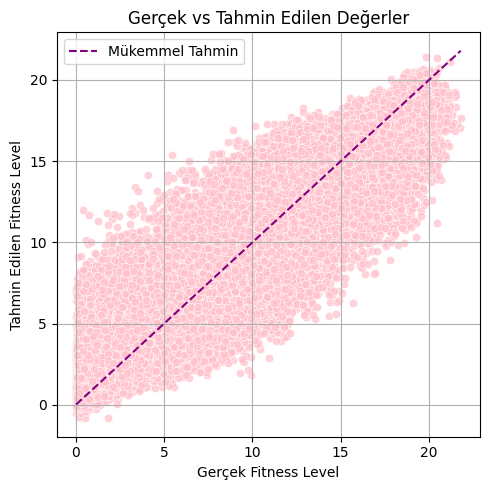

In [25]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test, y=y_pred, color='pink', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='purple', linestyle='--', label='Mükemmel Tahmin')
plt.xlabel("Gerçek Fitness Level")
plt.ylabel("Tahmin Edilen Fitness Level")
plt.title("Gerçek vs Tahmin Edilen Değerler")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### MODEL DEĞERLENDİRME(Feature Importance)

In [26]:
feature_importances = model.feature_importances_
features = X.columns

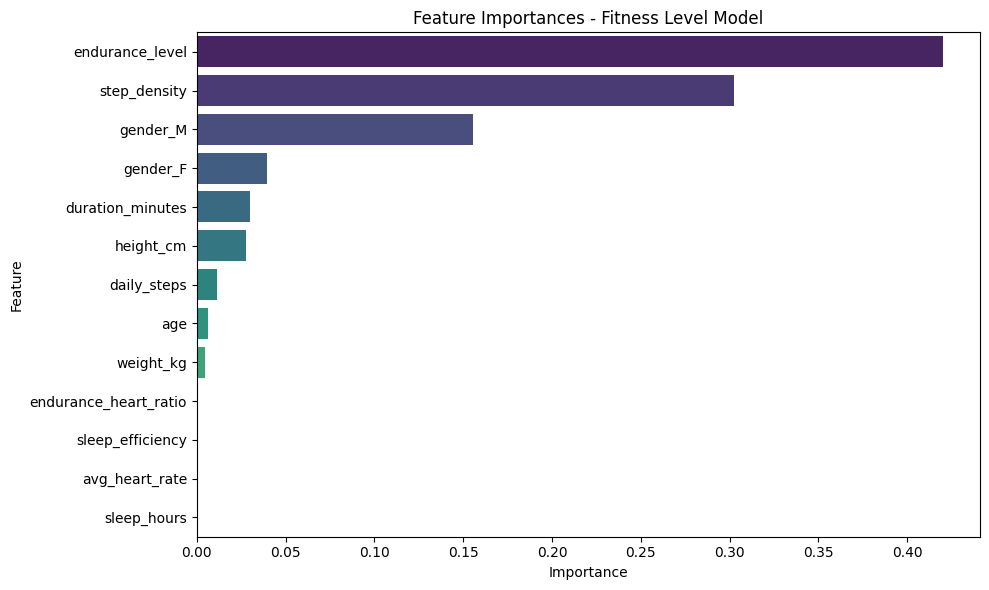

In [27]:
feature_importances = model.feature_importances_
features = X.columns

# DataFrame oluştur ve sırala
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Grafik çiz
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances - Fitness Level Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Yukarıda görüldüğü üzere modele en çok etkisi olan değişkenlerin görsel bir şeması sunulmuştur. Bu modelde en çok etkiyi endurance level, step_density gender değişkenleri üzerinde olduğu gözlenmiştir. Aslında Random Forest da benzer tablo vardı. Ancak burada belirttiğim değişkenlerin modele katkısının daha çok arttığını gözlemledik.

#### SONUÇLAR VE ÖNERİLER
Bu veri setinde proje başlangıcında belirttiğim soruna yönelik bir arayüz tasarlanacaktır. Bu çalışma ön hazırlık niteliğindedir.

İlerleyen aşamada, veri setinde var olan kullanıcılar için geleceğe yönelik sağlık seviye tahmini yapacak ve dahil olduğu sağlık grubuna göre geçmiş verileri elimizde olan kişilere tavsiyelerin verileceği bir sistem geliştirmek amaçlanmaktadır. Bunun için zaman serisi üzerine çalışma yapılacaktır.